# Google Colab 데이터 로드

In [ ]:
#Step 1.분석할 데이터가 저장된 파일을 불러와서 변수에 할당합니다.
from google.colab import files
myfile = files.upload()
import io
import pandas as pd
#pd.read_csv로 csv파일 불러오기
fruits = pd.read_csv(io.BytesIO(myfile['과일3개.csv']),
                       encoding='cp949')
fruits

# 로컬 데이터 로드

In [2]:
#컴퓨터에서 작업하려면 아래 코드의 주석을 제거하고 실행하면 됩니다
import pandas as pd
fruits = pd.read_csv('../../머신러닝실습용자료/과일3개.csv',encoding='cp949')
fruits

,종류,무게_g,길이_cm,당도
0,수박,2000,30.0,8.0
1,수박,2500,25.0,7.0
2,수박,1800,20.0,6.5
3,수박,1500,16.0,8.5
4,수박,2200,21.0,9.5
5,자두,100,3.5,6.0
6,자두,120,3.7,7.0
7,자두,90,2.8,8.0
8,자두,150,3.8,8.5
9,자두,110,3.6,7.5


# 공통 실습 코드

C:\Users\qq\AppData\Local\Temp\ipykernel_13656\4249871694.py:11: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "rD" (-> marker='D'). The keyword argument will take precedence.
  plt.plot([x1,x2,x3], [y1,y2,y3], "rD", \


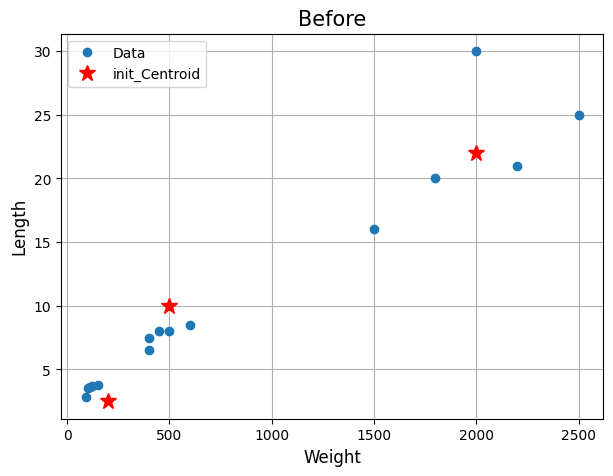

In [3]:
# Step 2.데이터의 분포를 그림으로 그리고 임의의 중심점 지정
import matplotlib.pyplot as plt
x1,y1 = 2000, 22
x2,y2 = 200, 2.5
x3,y3 = 500, 10

data = fruits[['무게_g','길이_cm']]
plt.figure(figsize=(7,5))
plt.title("Before", fontsize=15)
plt.plot(data["무게_g"], data["길이_cm"], "o", label="Data")
plt.plot([x1,x2,x3], [y1,y2,y3], "rD", \
         marker='*', markersize=12, label='init_Centroid')
plt.xlabel("Weight", fontsize=12)
plt.ylabel("Length", fontsize=12)
plt.legend()
plt.grid()
plt.show()

In [4]:
# Step 3. 군집 분석을 수행합니다.
from sklearn.cluster import KMeans
import numpy as np

# 군집 분석은 비지도학습이기에, target이 없습니다.
data = fruits[['무게_g','길이_cm']]

#초기의 점을 지정할 경우
#kmeans = KMeans(n_clusters=3, init=np.array([(x1,y1), (x2,y2), (x3,y3)]))

#초기의 점을 지정하지 않을 경우
kmeans = KMeans(n_clusters=3)

# 모델 학습
kmeans.fit(data)

# k-means의 라벨과, 중심점 좌표 가져오기
data['cluster'] = kmeans.labels_
final_centroid = kmeans.cluster_centers_

print(final_centroid)

[[ 114.      3.48]
 [2000.     22.4 ]
 [ 470.      7.7 ]]


C:\Users\qq\AppData\Local\Temp\ipykernel_13656\762024716.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['cluster'] = kmeans.labels_


In [5]:
data

,무게_g,길이_cm,cluster
0,2000,30.0,1
1,2500,25.0,1
2,1800,20.0,1
3,1500,16.0,1
4,2200,21.0,1
5,100,3.5,0
6,120,3.7,0
7,90,2.8,0
8,150,3.8,0
9,110,3.6,0


C:\Users\qq\AppData\Local\Temp\ipykernel_13656\379812364.py:5: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "rD" (-> marker='D'). The keyword argument will take precedence.
  plt.plot(final_centroid[:,0], final_centroid[:,1], "rD", \


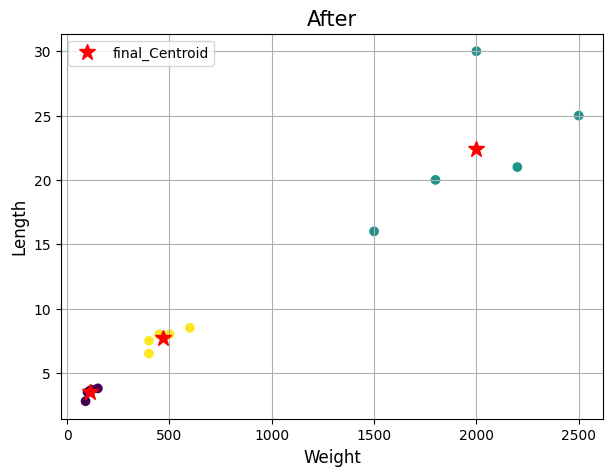

In [6]:
#Step 4. 군집화를 진행하여 최종 결과를 확인합니다.
plt.figure(figsize=(7,5))
plt.title("After", fontsize=15)
plt.scatter(data['무게_g'],data['길이_cm'],c=data['cluster'])
plt.plot(final_centroid[:,0], final_centroid[:,1], "rD", \
         marker='*',markersize=12, label='final_Centroid')
plt.xlabel("Weight", fontsize=12)
plt.ylabel("Length", fontsize=12)
plt.legend()
plt.grid()
plt.show()

In [7]:
# 각각의 요소에 대한 라벨 출력
print(kmeans.labels_)

[1 1 1 1 1 0 0 0 0 0 2 2 2 2 2]


In [8]:
# [500, 20] 데이터 넣었을 때 예측값 확인
kmeans.predict([[500,20]])

c:\Users\qq\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


array([2])

In [9]:
# [1700, 15] 데이터 넣었을 때 예측값 확인
kmeans.predict([[1700,15]])

c:\Users\qq\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


array([1])

In [10]:
# 클러스터 중심과 클러스터에 속한 샘플 사이의 거리의 제곱 합 출력
print(kmeans.inertia_)

610236.1279999999


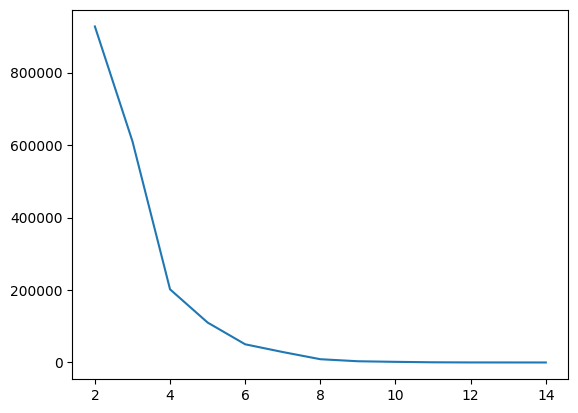

In [11]:
#최적의 군집 개수 찾기 - Elbow Method
import matplotlib.pyplot as plt

inertia = [ ]
for i in range(2,15) :
  km = KMeans(n_clusters=i)
  km.fit(data)
  inertia.append(km.inertia_)
plt.plot(range(2,15) , inertia)
plt.show()

In [12]:
# 초기의 점을 지정하지 않고, 최적의 군집 개수를 통해 군집화 진행
